In [1]:
# physics 411 assignment 3 code for parts of Q1 and Q2,3

# import libraries:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from scipy.stats import norm
import datetime 
import matplotlib.dates as mdates
from scipy import interpolate
import matplotlib.ticker as plticker
from scipy import signal

#### Question 1. Sinusoids
1. The sum of a cosine and sine function of a given frequency f can be expressed as a single
   phase-shifted cosine or sine function:
   a cos(2πf t) + b sin(2πf t) = A cos(2πfc + θc) = B sin(2πfs + θs)
   For the following assume: a = 1; b = 0.3; 0 ≤ t ≤ 2/f
   * a) Find analytical expressions for A, fc, θc, B, fs, θs
   * b) Demonstrate your result with an example of a discrete time series with 1000 data points
      and f = 2Hz. I.e. calculate and plot v.s. t
      a cos(2πf t); b sin(2πf t); a cos(2πf t) + b sin(2πf t);
      A cos(2πfc + θc)
      B sin(2πfs + θs)
      Include your code.

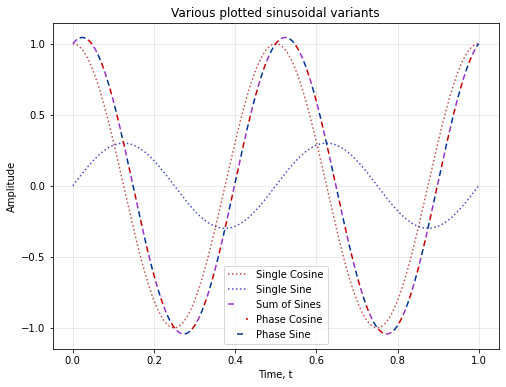

In [2]:
# now wish to show that the calculated result is true:

#using f = 2Hz with 1000 data points where 0<t<2/f:

# parameters:

aa = 1; bb = 0.3; ff = 2; tmin = 0; tmax = 2/ff; num_points = 1000

# time range:

tt = np.linspace(tmin, tmax, num_points)

# functions to plot:

a_cos = lambda t : aa*np.cos(2*np.pi*ff*t)

b_sin = lambda t : bb*np.sin(2*np.pi*ff*t)

sum_sines = lambda t : aa*np.cos(2*np.pi*ff*t) + bb*np.sin(2*np.pi*ff*t)

cos_phsh = lambda t : np.sqrt(aa**2 + bb**2) * np.cos(2*np.pi*ff*t + np.arctan(-bb/aa))

sin_phsh = lambda t : np.sqrt(aa**2 + bb**2) * np.sin(2*np.pi*ff*t + np.arctan(aa/bb))




fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
ax1.plot(tt, a_cos(tt), linestyle='dotted',color=[0.8,0.3,0.3], label="Single Cosine")
ax1.plot(tt, b_sin(tt), linestyle='dotted',color=[0.3,0.3,0.8], label="Single Sine")
ax1.plot(tt, sum_sines(tt), linestyle= (0,(4,14)), color=[0.6,0.2,0.8], label="Sum of Sines")
ax1.plot(tt, cos_phsh(tt), linestyle= (6,(4,14)), color=[0.8,0.,0.], label="Phase Cosine")
ax1.plot(tt, sin_phsh(tt), linestyle= (12,(4,14)), color=[0.,0.2,0.6], label="Phase Sine")

#ax1.plot(tt, sin_phsh(tt), color=[0.6,0.2,0.1])
#ax1.plot(tt, a_cos(tt), color=[0.6,0.2,0.7])
ax1.set_title("Various plotted sinusoidal variants")
ax1.set_xlabel(r"Time, t")
ax1.set_ylabel(r"Amplitude" )
ax1.grid(True, alpha=0.3)
ax1.legend()




#### Question 2. Interpolation
For the following use the zero-mean hour-resolution temperature data set $x_H = T − T{mean}$ for
the Station UVic Science Building (48.462 N, 236.691E ) using data from 1 July 2020 to 31
August 2020, only. Please include your code. You may want to use functions like interp1.m or
scipy.interpolate.interp1d and xcov.m.
1. a) Generate a new time series xsub with ∆t = 19.2h (i.e. 0.8 day) sampling rate, by interpolating the original data xH to the new sampling rate.

   b) Recreate the hour-sampled time series xrec from these sub-sampled data points xsub, using
    a cubic spline interpolation.

    c) Plot the original and the recreated time series for August, only (on the same plot).

   d) Calculate and plot the lagged-autocorrelation coefficient for all three time series, for lags
   up to 10 days.
    Discuss what are the dominant periods of the three time series (What are the similar features,
   what are different? Why?) 
   
   e) Repeat a) to d), but with ∆t = 7.2h (i.e. 0.3 day) sampling rate.

   f) What can you say about the ability to recover the original data, i.e. using interpolation
   to increase sampling rates?
   (12 points)

In [3]:
# first load in the data:

hourly_temp =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_temperature_hourly.dat").T

time = hourly_temp[0]
uvic_ht = hourly_temp[14]
# clean up header
uvic_ht = uvic_ht[3:]
time = time[3:]


In [4]:
# time parameters:

time_2_1july20 = 442656 #hrs
time_2_31august20 = 444120  #hrs
length_of_sample = time_2_31august20 - time_2_1july20 #hrs
initial_time = 16801 # days

difference_1july20 = (time_2_1july20 - initial_time *24)

# final data set:

data_ht = uvic_ht[difference_1july20:difference_1july20 + length_of_sample]
time_f = time[difference_1july20:difference_1july20 + length_of_sample]
time_plot = time_f + initial_time


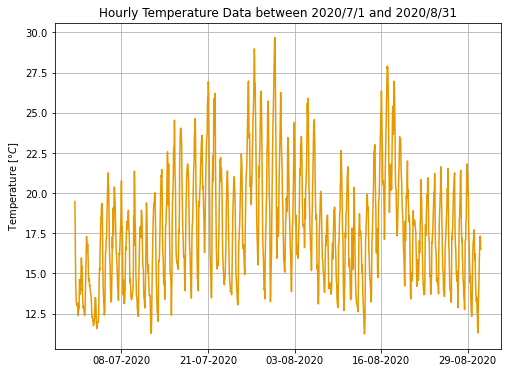

In [5]:
# plots the time series to ensure correct data:

ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(8)
ff.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(time_plot, data_ht, color=[0.9,0.6,0.])
ax1.set_title("Hourly Temperature Data between 2020/7/1 and 2020/8/31")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

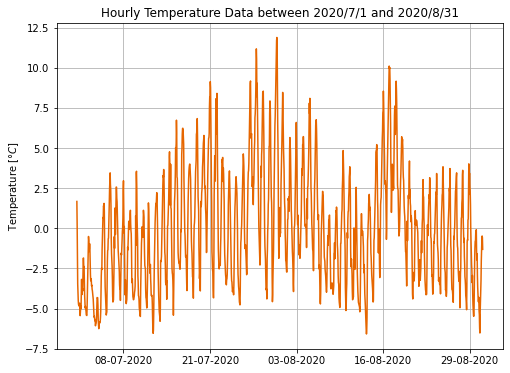

In [6]:
# now need to take zero-mean hourly resolved data:

mean_t = np.mean(data_ht)

data_zm = data_ht - mean_t

# plots it just to be safe:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(time_plot, data_zm, color=[0.9,0.4,0.])
ax1.set_title("Hourly Temperature Data between 2020/7/1 and 2020/8/31")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

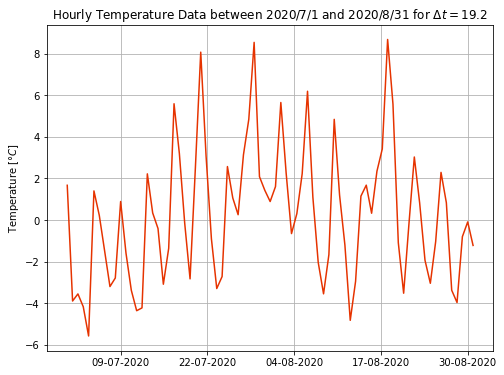

In [7]:
# to produce a data set with a lower sampling rate we now fit a interpolation
# object to the above data:

interp_ht = interpolate.interp1d(time_plot,data_zm, kind='cubic')

# now need list of sampled times:

delta_t = 19.2/24 # hrs

t19_plot = [((ii)*delta_t+time_2_1july20/24) for ii in range(int(length_of_sample/19.2)+1)]

# evaluates the interp function at all sampled points:

data_s19 = interp_ht(t19_plot)

# plots just to be safe:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(t19_plot, data_s19, color=[0.9,0.2,0.])
ax1.set_title(r"Hourly Temperature Data between 2020/7/1 and 2020/8/31 for $\Delta t =19.2$ ")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

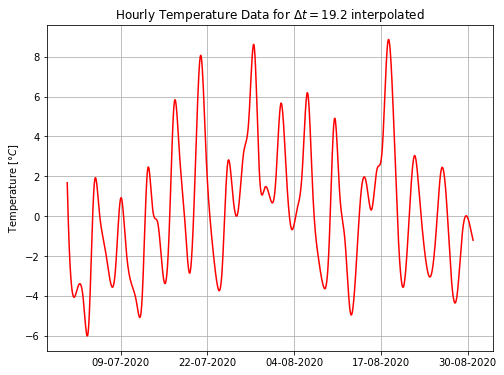

In [8]:
# now wish to apply a cubic spline interpolation on this data to smooth out 
# and recreate the previous time series:

interp_s19 = interpolate.interp1d(t19_plot,data_s19, kind='cubic')


# plots just to be safe:

# slight change in range is due to the sampling rate in the interpolation regime
# losing the interpolation range above the max integer value of delta_t:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(time_plot[:1460], interp_s19(time_plot[:1460]), color=[1,0.,0.])
ax1.set_title(r"Hourly Temperature Data for $\Delta t =19.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

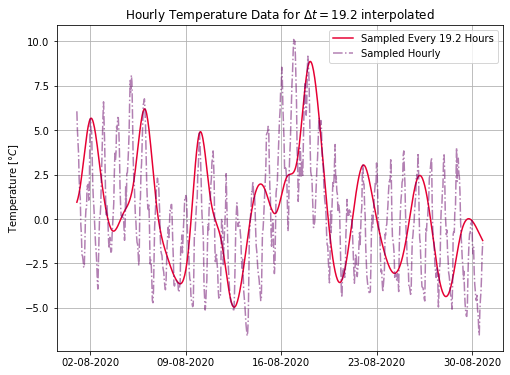

In [9]:
# now we wish to plot the above time series on the same plot for august only:

len_july = 31 * 24 #hours 

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.plot(time_plot[len_july:1460], interp_s19(time_plot[len_july:1460]), color=[0.9,0.,0.2], label="Sampled Every 19.2 Hours")
ax1.plot(time_plot[len_july:1460], data_zm[len_july:1460], '-.' ,color=[0.4,0.,0.4], alpha=0.5, label="Sampled Hourly")
ax1.set_title(r"Hourly Temperature Data for $\Delta t =19.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)
ax1.legend()

In [10]:
# now we wish to find the lagged autocorrelation for all three of the above time series:
# will simply use the function written for the last assignment as it works well:

def lag_correlation( X, taumax):
    '''
    t = time vector
    X = input time series data set
    tau = maximum lag
    
    '''
    
    # first need the mean of the data set:
    X_mean = np.mean(X)
    
    # also need the variance:
    X_var = (np.std(X, ddof=1))**2
    
    # need a list of desired lags:
    lags = [i for i in range(int(taumax)+1)]
    
    # gotta subtract the mean of the data set from each value for later:
    
    X_sub_mean = [xx - X_mean for xx in X]
    
    # now if we loop through all possible lags and calculate the requisite value 
    # we will have the auto correlation function:
    
    corr_func = len(lags) * [0]
    for lag in lags:
        corr = 1
        
        if (lag >= 1):
            
            auto_cov = [X_sub_mean[lag:][ii]*X_sub_mean[:-lag][ii] for ii in range(len(X)-lag)]
            
            val = sum(auto_cov) / (len(X)-1)
            corr = val/X_var
        corr_func.append(corr)
        
    
    return [lags, corr_func]

In [11]:
# lags:

# max lag is 10 days but need to specify sampling rate:

taumax = 10 * 24 # hours
tau_s = taumax/19.2  # hours

# lagged autocorrelation for the three datasets:

lag_data = lag_correlation(data_zm, taumax)

lag_data_s19 = lag_correlation(data_s19, int(tau_s+1))

lag_data_s19_int = lag_correlation(interp_s19(time_plot[len_july:1460]), taumax)


In [12]:
# manipulates data into plottable form:

lag_data_eff = lag_data[1][241:]
lag_s19_eff = lag_data_s19[1][14:]
lag_s19_int_eff  = lag_data_s19_int[1][241:]

lag_data_plot = list(reversed(lag_data_eff)) + lag_data_eff
lag_s19_plot = list(reversed(lag_s19_eff[1:])) + lag_s19_eff
lag_s19_int_plot = list(reversed(lag_s19_int_eff)) + lag_s19_int_eff

# time lag:

neg_lag_data = [-1 * lag_data[0][-i] for i in lag_data[0]]
time_lag = neg_lag_data + lag_data[0]

# time lags for sampled data:

neg_s19_data = [-1 * lag_data_s19[0][-i] for i in lag_data_s19[0]]
time_s19 = neg_s19_data + lag_data_s19[0]

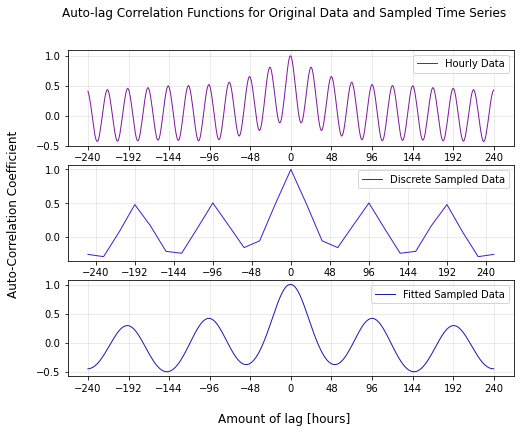

In [13]:
# now plots the lag correlation coefficients:

#Spacing between each line

intervals = 48

loc = plticker.MultipleLocator(intervals)

lag_data_eff = lag_data[1][241:]
lag_s19_eff = lag_data_s19[1]
lag_s19_int_eff  = lag_data_s19_int[1][241:]


# plots the lag correlation data:
ff, (ax1,ax2,ax3) = plt.subplots(3, 1)
ff.set_figwidth(8)
ff.set_figheight(6)
ff.suptitle("Auto-lag Correlation Functions for Original Data and Sampled Time Series")
ff.supxlabel('Amount of lag [hours]')
ff.supylabel('Auto-Correlation Coefficient')
# just plot positive time lags:
ax1.plot(time_lag[1:], lag_data_plot[1:], '-',color=[0.5,0.1,0.6], linewidth=1, label="Hourly Data")
ax2.plot(np.array(time_s19[1:])*19.2, lag_s19_plot, '-',color=[0.3,0.1,0.8], linewidth=1, label='Discrete Sampled Data')
ax3.plot(time_lag[1:], lag_s19_int_plot[1:], '-',color=[0.1,0.1,0.7], linewidth=1, label='Fitted Sampled Data')

ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylim(-0.5,1.1)
ax1.grid(which="major",alpha=0.3)
ax2.grid(which="major",alpha=0.3)
ax3.grid(which="major",alpha=0.3)
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)
ax3.xaxis.set_major_locator(loc)
ax1.legend()
ax2.legend()
ax3.legend()



Of the three time series, two seem to match up well while the first is quite different. As expected, the hourly sampled time series has a very smooth autocorrelation function with a regular period of what appears to be exactly 24 hours. Since this time series is adequately sampled, we would expect daily periodicity in the auto-correlation function which is seen here. It also has a non-linear decay in envelope amplitude which seems to settle after lags greater than 4 or 5 days. What is more interesting are the other two correlation functions. The middle, discrete data set is only lag checked ~13 times, and as such is much less smooth compared to the first one. Since the sampling rate of 19.2 hours is not a nice fraction of a day, the time of day sampled is too unpredictable to resolve any small correlations such as daily temperature variations. We entirely lose daily correlation in this set with much courser resolution. We do have some periodicity corresponding to about 4 days or 96 hours. We get this as it is a multiple of 19.2 hours and as such is the point when daily periodicity in the data folds back in on itself in the undersampled data. The period here is a remnant of the dominant period in the hourly sampled data. We cannot resolve this period explicitly and so information is lost from the original data when sampled ~19x less. Finally, the fitted sampled data with hourly points exhibits a quite similar auto-correlation to that of the barely sampled data. It is, however, much smoother as expected but the periodicity at 4 days is identical to the undersampled set.


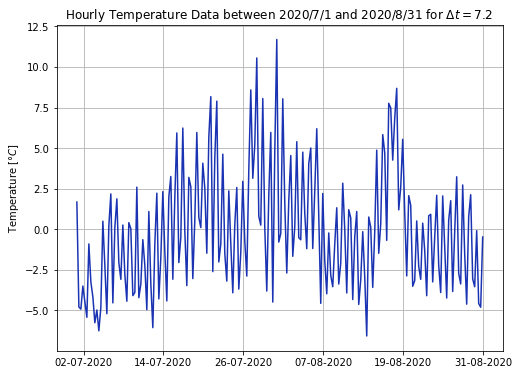

In [14]:
# we now wish to repeat the above analysis but for a delta_t = 7.2 hrs:

# to produce a data set with a lower sampling rate we now fit a interpolation
# object to the above data:

interp_ht = interpolate.interp1d(time_plot,data_zm, kind='cubic')

# now need list of sampled times:

delta_t = 7.2/24 # hrs

t7_plot = [((ii)*delta_t+time_2_1july20/24) for ii in range(int(length_of_sample/7.2)+1)]

# evaluates the interp function at all sampled points:

data_s7 = interp_ht(t7_plot)

# plots just to be safe:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=12))
ax1.plot(t7_plot, data_s7, color=[0.1,0.2,0.7])
ax1.set_title(r"Hourly Temperature Data between 2020/7/1 and 2020/8/31 for $\Delta t =7.2$ ")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)







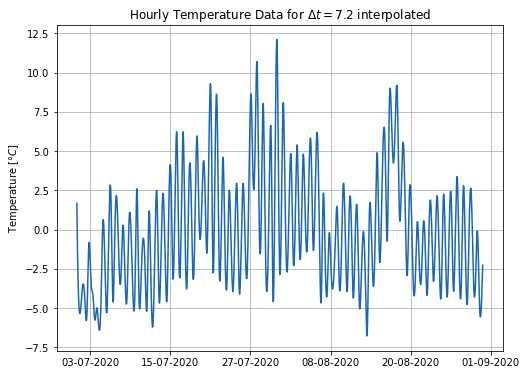

In [15]:
# now wish to apply a cubic spline interpolation on this data to smooth out 
# and recreate the previous time series:

interp_s7 = interpolate.interp1d(t7_plot,data_s7, kind='cubic')


# plots just to be safe:

# slight change in range is due to the sampling rate in the interpolation regime
# losing the interpolation range above the max integer value of delta_t:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=12))
ax1.plot(time_plot[:1460], interp_s7(time_plot[:1460]), color=[0.1,0.4,0.7])
ax1.set_title(r"Hourly Temperature Data for $\Delta t =7.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

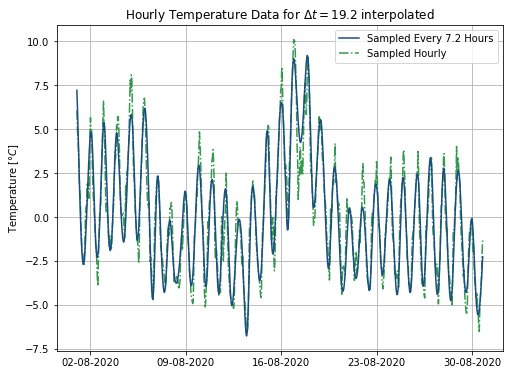

In [16]:
# now we wish to plot the above time series on the same plot for august only:

len_july = 31 * 24 #hours 

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.plot(time_plot[len_july:1460], interp_s7(time_plot[len_july:1460]), color=[0.1,0.3,0.5], label="Sampled Every 7.2 Hours", zorder=10)
ax1.plot(time_plot[len_july:1460], data_zm[len_july:1460], '-.' ,color=[0.2,0.6,0.3], alpha=1, label="Sampled Hourly")
ax1.set_title(r"Hourly Temperature Data for $\Delta t =19.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)
ax1.legend()

In [17]:
# now want to do same with the correlation function:

# lags:

taumax = 10 * 24 # hours
tau_s7 = taumax / 7.2

# lagged autocorrelation for the three datasets:

lag_data_s7 = lag_correlation(data_s7, int(tau_s7+1))

lag_data_s7_int = lag_correlation(interp_s7(time_plot[len_july:1460]), taumax)

# manipulates data into plottable form:

lag_s7_eff = lag_data_s7[1][35:]
lag_s7_int_eff  = lag_data_s7_int[1][241:]

lag_s7_plot = list(reversed(lag_s7_eff[1:])) + lag_s7_eff
lag_s7_int_plot = list(reversed(lag_s7_int_eff)) + lag_s7_int_eff


# time lags for sampled data:

neg_s7_data = [-1 * lag_data_s7[0][-i] for i in lag_data_s7[0]]
time_s7 = neg_s7_data + lag_data_s7[0]

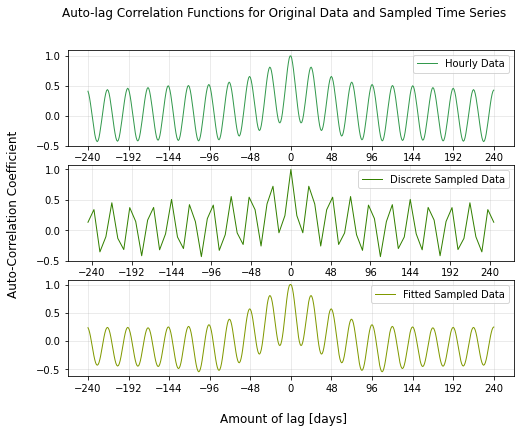

In [18]:
# now plots the lag correlation coefficients:


#Spacing between each line
intervals = 48

loc = plticker.MultipleLocator(intervals)

lag_data_eff = lag_data[1][241:]
lag_s19_eff = lag_data_s19[1][241:]
lag_s19_int_eff  = lag_data_s19_int[1][241:]


# plots the lag correlation data:
ff, (ax1,ax2,ax3) = plt.subplots(3, 1)
ff.set_figwidth(8)
ff.set_figheight(6)
ff.suptitle("Auto-lag Correlation Functions for Original Data and Sampled Time Series")
ff.supxlabel('Amount of lag [days]')
ff.supylabel('Auto-Correlation Coefficient')
# just plot positive time lags:
ax1.plot(time_lag[1:], lag_data_plot[1:], '-',color=[0.2,0.6,0.3], linewidth=1, label="Hourly Data")
ax2.plot(np.array(time_s7[1:])*7.2, lag_s7_plot, '-',color=[0.2,0.5,0.], linewidth=1, label='Discrete Sampled Data')
ax3.plot(time_lag[1:], lag_s7_int_plot[1:], '-',color=[0.5,0.6,0.], linewidth=1, label='Fitted Sampled Data')

ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylim(-0.5,1.1)
ax1.grid(which="major",alpha=0.3)
ax2.grid(which="major",alpha=0.3)
ax3.grid(which="major",alpha=0.3)
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)
ax3.xaxis.set_major_locator(loc)
ax1.legend()
ax2.legend()
ax3.legend()



Compared to the sparse sampling rate prior, we achieve quite different results. Nothing changed to the original data set correlation function, still 24 hour-periodic. What is particularly interesting is the change to the middle and bottom plots with only a change in the sampling rate. In all three correlation functions we have 24 hour periodicity. The 7.2 hour sampled set does not have enough points to resolve the auto-lag correlaiton well and as such it is rather pointy. Compared to the 19.2 hr sampling rater, however, we retain all of the dominant periodicity from the baseline set. The curve may not be smooth but it does match up very well with the hourly sampled data. 

Similarly, the fitted sample data function follows the same trend with a the same period. In fact, it appears to almost exactly match the baseline function we found for the hourly data. For a sampling rate of ~7 times worse than the hourly data (with interpolation) we achieve nearly the same correlation function.


This means that we can recover nearly all of the pertinent information from the data with a much lower sampling rate combined with a sufficient interpolation scheme. It is likely that we would get diminishing returns on information recovery up until about a sampling rate of half of a day, since a daily period is very much dominant. After that, both the auto-correlation coefficient function and the correctness of the information stored in the data would decrease, like can be seen in the initial sampling rate of 19.2 hours. 

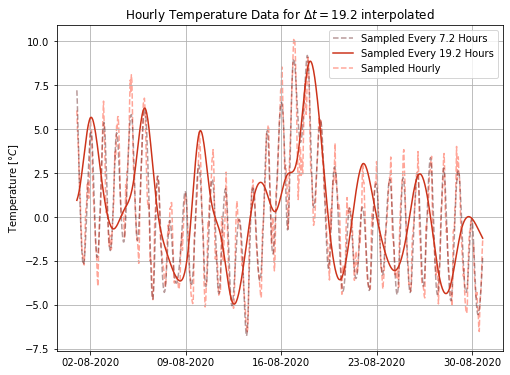

In [19]:
# out of interest we will plot a few more figures. First the three data sets
# superimposed:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.plot(time_plot[len_july:1460], interp_s7(time_plot[len_july:1460]), '--',alpha=0.4, color=[0.3,0.,0.], label="Sampled Every 7.2 Hours", zorder=5)
ax1.plot(time_plot[len_july:1460], interp_s19(time_plot[len_july:1460]), color=[0.8,0.2,0.1], label="Sampled Every 19.2 Hours",zorder=10)
ax1.plot(time_plot[len_july:1460], data_zm[len_july:1460] , '--', color=[1,0.3,0.2],alpha=0.5, label="Sampled Hourly",zorder=0)
ax1.set_title(r"Hourly Temperature Data for $\Delta t =19.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)
ax1.legend()




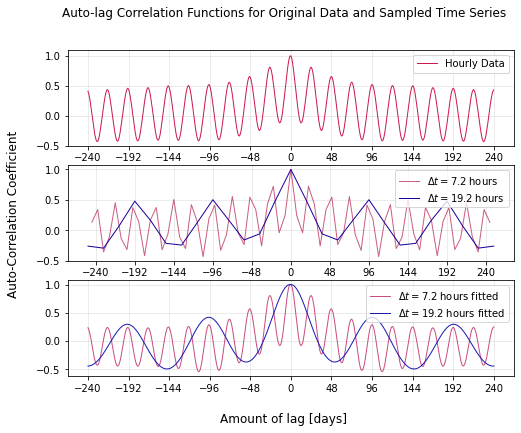

In [20]:
# now gonna plot the lag correlations against each other for each case:

# plots the lag correlation data:
ff, (ax1,ax2,ax3) = plt.subplots(3, 1)
ff.set_figwidth(8)
ff.set_figheight(6)
ff.suptitle("Auto-lag Correlation Functions for Original Data and Sampled Time Series")
ff.supxlabel('Amount of lag [days]')
ff.supylabel('Auto-Correlation Coefficient')
# just plot positive time lags:
ax1.plot(time_lag[1:], lag_data_plot[1:], '-',color=[0.8,0.1,0.3], linewidth=1, label="Hourly Data")
ax2.plot(np.array(time_s7[1:])*7.2, lag_s7_plot, '-',color=[0.7,0.1,0.3],alpha=0.7, linewidth=1, label=r'$\Delta t = 7.2$ hours')
ax3.plot(time_lag[1:], lag_s7_int_plot[1:], '-',color=[0.7,0,0.3], linewidth=1,alpha=0.7, label=r'$\Delta t = 7.2$ hours fitted')
ax2.plot(np.array(time_s19[1:])*19.2, lag_s19_plot, '-',color=[0.1,0.,0.6], linewidth=1, label=r'$\Delta t = 19.2$ hours ')
ax3.plot(time_lag[1:], lag_s19_int_plot[1:], '-',color=[0.1,0.1,0.7], linewidth=1, label=r'$\Delta t = 19.2$ hours fitted')


ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylim(-0.5,1.1)
ax1.grid(which="major",alpha=0.3)
ax2.grid(which="major",alpha=0.3)
ax3.grid(which="major",alpha=0.3)
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)
ax3.xaxis.set_major_locator(loc)
ax1.legend()
ax2.legend()
ax3.legend()


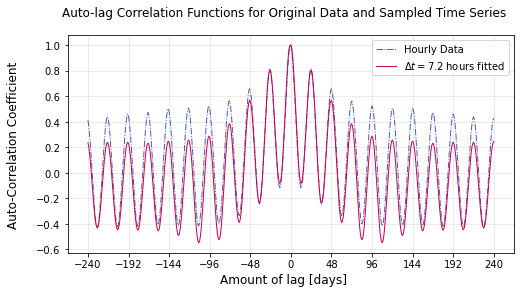

In [21]:
# finally, it would be interesting to see the 7.2 and hourly sampled correlations next to each other:

# now gonna plot the lag correlations against each other for each case:

# plots the lag correlation data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(8)
ff.set_figheight(4)
ff.suptitle("Auto-lag Correlation Functions for Original Data and Sampled Time Series")
ff.supxlabel('Amount of lag [days]')
ff.supylabel('Auto-Correlation Coefficient')
# just plot positive time lags:
ax1.plot(time_lag[1:], lag_data_plot[1:], '-.',color=[0.,0.1,0.6], alpha=0.7,linewidth=1, label="Hourly Data")
ax1.plot(time_lag[1:], lag_s7_int_plot[1:], '-',color=[0.8,0.,0.3], linewidth=1, label=r'$\Delta t = 7.2$ hours fitted', zorder=10)
ax1.xaxis.set_major_locator(loc)
ax1.grid(which="major",alpha=0.3)
ax1.legend()


Upon further inpsection, the functions for these two cases are in fact not identically the same. The exhibit the same periodicity exactly, but the amplitudes of the period decays faster for the worse sampled data. As it pertains to the question being answered here, there is some noticeable loss in the original function for lower sampling rates. This can be clearly shown above. That being said, any periodic behaviours in the real data set is not lost when sampled at a lower rate. It would be expected that the hourly data found here would have a similiar $\textit{relative}$ shape with respect to, for example, the minute data from the same station.

#### Question 3. Fourier Series of a square wave

1. Calculate the exponential Fourier series $\hat{x}$(t) of following signal:
    x(t) = {−1, −T/2 < t < 0, +1, 0 ≤ t < T/2} , x(t + nT) = x(t)
    * Determine the Fourier coefficients Sm (show your work, i.e. some intermediate steps)
   * Plot ˆx(t) in the interval −3T/2 ≤ t ≤ 3T/2 for 1, 2, 5, 10, 100 terms, and for x(t).
    * Plot the power spectrum of $\hat{x}(t)$ for a record length 100 T and a sampling rate ∆t =
      T/200. (Don’t include confidence limits).
      * a) for $\hat{x}(t)$ based on 5 terms
      * b) for $\hat{x}(t)$ based on 100 terms.

Since I do not want to join four seperate PDFs, this analysis will be performed in markdown below. To find the fourier coefficients we exploit the orthogonality of complex exponentials. Our series will then take the form of an infinite sum of basis 'vectors' as follows:

$$ \hat{x}(t) = \sum_{n=-\infty}^{\infty} S_m e^{in\omega_0 t}$$

Where, in our case, $\omega_0 = \frac{2 \pi }{T}$. To find the coefficients of the above function, $x(t)$, we need to perform the following integrals:


$$ S_0 = \frac{1}{T} \int_{-T/2}^{T/2}  x(t) dt;  \; \; \; \;  \; \; \; S_m = \frac{1}{T} \int_{-T/2}^{T/2}  x(t) e^{-in\omega_0t}dt$$

We begin first by calculating $S_0$:

$$S_0 = \frac{1}{T} \int_{-T/2}^{T/2}  x(t) dt = \frac{1}{T} \int_{-T/2}^{0}  (-1) dt + \frac{1}{T} \int_{0}^{T/2}  (1) dt = S_0 = \frac{1}{T} (-T/2 + T/2) = 0 $$

Followed by the fourier series coefficients:

$$S_m = \frac{1}{T} \int_{-T/2}^{T/2}  x(t) e^{-in\omega_0t}dt \\ 
S_m = \frac{1}{T} \int_{-T/2}^{0}  (-1) \cdot e^{-in\omega_0t}dt +  \frac{1}{T} \int_{0}^{T/2}  (1) \cdot e^{-in\omega_0t}dt  \\ S_m =\frac{1}{T} \left( \frac{-1}{-in\omega_0}e^{-in\omega_0t}\right) \bigg | ^{0}_{-T/2}   +    \left(\frac{1}{-in\omega_0}e^{-in\omega_0t} \right) \bigg | _{0}^{T/2}   $$

We know that $\omega_0 = \frac{2 \pi }{T}$ and so the above becomes:


$$S_m = \frac{1}{in2\pi} \left[( 1 - e^{in\pi}) - (e^{-in\pi}-1)\right] \longrightarrow S_m = \frac{1}{in2\pi} \left[( 1 - e^{in\pi}) + (1-e^{-in\pi})\right]$$

Since all n's are integers in the fourier expansion, the complex exponentials can be simplified to just powers of $-1$. We can show this using Euler's formula explicitly:

$$e^{i\phi} = \left[cos(\phi) + isin(\phi) \right]\bigg |^{\phi=n\pi} where \ n \in \mathbb{Z} \longrightarrow e^{in\pi} = cos(n\pi) + isin(n\pi)  = (-1)^n + 0i$$

This is true for either n or -n. So our coefficients now become:

$$S_m = \frac{1}{in2\pi} \left[( 1 - e^{in\pi}) + (1-e^{-in\pi})\right] = \frac{1}{in2\pi} \left[ (1-(-1)^n)+(1-(-1)^n \right]$$

This nicely simplifies to:

$$S_m = \frac{(1-(-1)^n)}{in\pi}$$

So the final fourier series of the function x(t) is as follows:

$$\hat{x}(t) = \sum^{\infty}_{n=-\infty}\frac{(1-(-1)^n)}{in\pi} e^{in\frac{2\pi}{T}t} \longrightarrow \sum^{\infty}_{n=-\infty}-i\frac{(1-(-1)^n)}{n\pi} e^{in\frac{2\pi}{T}t} $$

The coefficient $S_m$ is a complex nuimber of the form $a_n + ib_n = Re(S_m) + i Im(S_m)$. This can be decomposed into a linear combination of sines and cosines with $a_n$ as the cosine coefficient and $b_n$ as the sine coefficient. By inspection, $S_m$ has no real parts and we can say $a_n = 0$ and that our function $x(t)$ is comprised of only sine functions. The rest of the analysis will only use sine terms.


In [22]:
# we now wish to plot x_hat(t) for a number of terms. To do this, it will be helpful to create
# a generic function for arbitrary number of terms and for arbitrary t vectors:

def x_series(N,t):
    '''
    Truncated fourier series of the function x(t):
    
    N = number of terms in the series (N=0 ---> bn = 0 so N>1)
    t = time vector evaluated at
    '''
    # vector of n values to iterate over:
    n_vector = np.array(range(1,N))
    
    # lambda function to evaluate the bn's
    b_ns = lambda nn : -(1-(-1)**nn)/(nn *np.pi)
    
    # series approximation for the function with n terms:
 
    func_vects =[]
    for nn in n_vector:
        sin_n = [b_ns(nn)*np.sin(2*np.pi*nn*ti) for ti in t]
        func_vects.append(sin_n)
    
    # transposes and then adds all elements of all sinusoidal terms for each n:
    func_vects = np.array(func_vects).T
    func_vals = [2*sum(func_vects[i]) for i in range(len(func_vects))]
    
    # deals with if N = 1: 
    if N ==1:
        func_vals = [0]*len(t)
    
    return func_vals
            

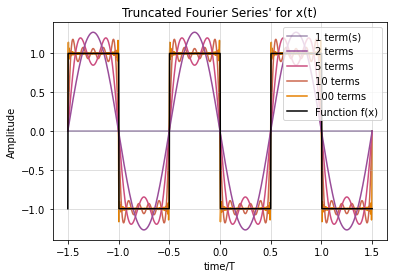

In [23]:
tt = np.linspace(-3/2,3/2,1000)

plt.figure(1)

plt.plot(tt, x_series(1,tt), color = [0.4,0.28,0.5],zorder=4 , alpha = 0.6, label="1 term(s)")
plt.plot(tt, x_series(2,tt), color = [0.6, 0.3, 0.6], zorder=3,label="2 terms")
plt.plot(tt, x_series(5,tt), color = [0.8, 0.3, 0.5], zorder=2,label="5 terms")
plt.plot(tt, x_series(10,tt), color = [0.8, 0.4, 0.3], zorder=1,label="10 terms")
plt.plot(tt, x_series(100,tt), color = [0.9, 0.5, 0.], zorder=0,label="100 terms")
        
# plots square wave
plt.plot(tt, signal.square(2 * np.pi  * tt-np.pi-0.01), c='k', zorder=5,label="Function f(x)")
plt.xlabel('time/T')
plt.ylabel("Amplitude")
plt.grid(alpha=0.5)
plt.legend(loc=1,)
plt.title("Truncated Fourier Series' for x(t)")
plt.show()

In [36]:
# now we wish to find and plot the power spectrum for t = [0,100T] with a sampling rate of 
# delta_t = T/200. First with 5 terms in the series and next with 100:

# to do this we will take the FFT of the two functions in the desired range with the desired sampling rate.

def pow_spec(t,func):
    '''
    General function for calculating the power spectrum of a signal
    
    t = vector of time values of interest
    func = vector of function values at t[i]
    '''
    # number of elements:
    num = len(t)  
    
    # sampling rate of data: 
    delta_t = 1/(t[1]-t[0])  
    
    # takes fourier transform as well as gets list of requisite frequencies:
    
    # fourier transform will be symmetrical with pos/neg frequencies so can 
    # combine and take magnitude: FUNC(-f) = FUNC(f) ---> FUNC(-f) + FUNC(f) = 2FUNC(f)
    
    FUNC = np.fft.fft(func)
    freq = np.fft.fftfreq(num,1/delta_t)
    
    FUNC_mag = 2 * np.abs(FUNC)**2 
    FUNC_mag = FUNC_mag[1:int(num/2)] # over half the range
    
    #reindexes frequencies as well:
    freq_int = freq[1:int(num/2)]

    
    return freq_int,FUNC_mag



In [37]:
# we wish to sample at a rate of delta_t = T/200 with a record length of 100T:

RL = 100 # T
delta_t = 1/200 # * T
points = RL/delta_t

# time vector:

ttrl = np.linspace(0,RL, int(points))

# now finds the power spectra of n = 5, n = 100 and of the square wave itself for good measure:

freq_5,PS_5 = pow_spec(ttrl, x_series(5,ttrl))

freq_100, PS_100 = pow_spec(ttrl, x_series(100,ttrl))

freq_sq, PS_sq = pow_spec(ttrl, signal.square(2 * np.pi  * ttrl-np.pi))
                

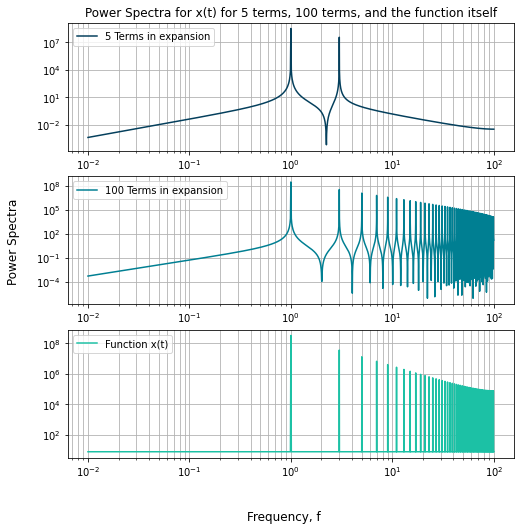

In [38]:
# now plots the power spectra in various ways:

# plots the power spectra data side by side:
ff, (ax1,ax2,ax3) = plt.subplots(3, 1)
ff.set_figwidth(8)
ff.set_figheight(8)
#ff.suptitle("Power Spectra for x(t) for 5 terms, 100 terms, and the function itself")
ff.supxlabel('Frequency, f')
ff.supylabel('Power Spectra')
ax1.set_title("Power Spectra for x(t) for 5 terms, 100 terms, and the function itself")
ax1.loglog(freq_5, PS_5, color='#043f5c', label="5 Terms in expansion")
ax2.loglog(freq_100, PS_100, color='#007f92', label='100 Terms in expansion')
ax3.loglog(freq_sq, PS_sq, color='#1cc1a5', label='Function x(t)')
ax1.grid(True, which='both')
ax2.grid(True, which='both')
ax3.grid(True, which='both')
ax1.legend(loc=2)
ax2.legend(loc=2)
ax3.legend(loc=2)

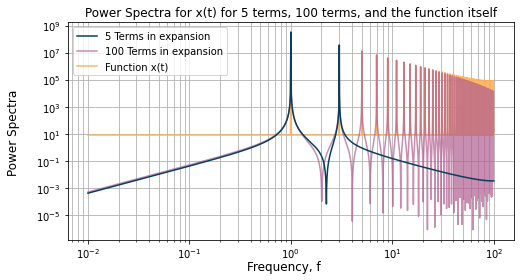

In [39]:
# now on the same plot:

# plots the power spectra data side by side:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(8)
ff.set_figheight(4)
#ff.suptitle("Power Spectra for x(t) for 5 terms, 100 terms, and the function itself")
ff.supxlabel('Frequency, f')
ff.supylabel('Power Spectra')
ax1.set_title("Power Spectra for x(t) for 5 terms, 100 terms, and the function itself")
ax1.loglog(freq_5, PS_5, color='#043f5c', label="5 Terms in expansion", zorder=10)
ax1.loglog(freq_100, PS_100, color='#b15e90', alpha=0.7,label='100 Terms in expansion', zorder=5)
ax1.loglog(freq_sq, PS_sq, color='#ffaf53', alpha=0.9,label='Function x(t)')
ax1.grid(True, which='both')
ax1.legend(loc=2)
